# Introduction

This notebooks presents simple **Multi-Layer Perceptron** in Keras model to solve **College Admissions** problem

**Contents**

* [College Admissions Dataset](#College-Admissions-Dataset) - load and preprocess dataset
* [Keras Model](#Keras-Model) - define and train neural net

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Limit TensorFlow GPU memory usage

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config):
    pass  # init sessin with allow_growth

# College Admissions Dataset

Load and show raw, unprocessed data

In [3]:
dataset_file = '../Datasets/college-admissions/college_admissions.csv'
df = pd.read_csv(dataset_file)
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Preprocess dataset

In [4]:
# Create dummies
temp = pd.get_dummies(df['rank'], prefix='rank')
data = pd.concat([df, temp], axis=1)
data.drop(columns='rank', inplace=True)

# Normalize
for col in ['gre', 'gpa']:
    mean, std = data[col].mean(), data[col].std()
    # data.loc[:, col] = (data[col]-mean) / std
    data[col] = (data[col]-mean) / std

# Split off random 20% of the data for testing
np.random.seed(0)  # for reproducibility
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features_train = data.drop('admit', axis=1)
targets_train =  data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

# Convert to numpy
x_train = features_train.values            # features train set (numpy)
y_train = targets_train.values[:,None]     # targets train set (numpy)
x_test = features_test.values              # features validation set (numpy)
y_test = targets_test.values[:,None]       # targets validation set (numpy)

# Assert shapes came right way around
assert x_train.shape == (360, 6)
assert y_train.shape == (360, 1)
assert x_test.shape == (40, 6)
assert y_test.shape == (40, 1)

Train data looks like this

In [5]:
x_train[0:6].round(2)

array([[-0.07,  0.03,  0.  ,  1.  ,  0.  ,  0.  ],
       [-1.28, -1.08,  0.  ,  0.  ,  1.  ,  0.  ],
       [-0.24, -1.94,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.63, -0.84,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.8 , -0.13,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.28, -0.55,  0.  ,  1.  ,  0.  ,  0.  ]])

In [6]:
y_train[0:6]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1]])

# Keras Model

Model with one hidden, one output layer

In [7]:
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential()
model.add(Dense(units=128, input_dim=6, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x=x_train, y=y_train, batch_size=len(x_train), epochs=500, verbose=0)

Show final results

In [9]:
loss, acc = model.evaluate(x_train, y_train, verbose=0)
print(f'Accuracy on train set: {acc:.2f}')

Accuracy on train set: 0.71


In [10]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy on test set: {acc:.2f}')

Accuracy on test set: 0.75


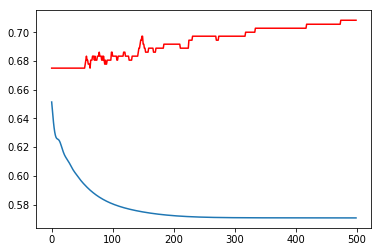

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['acc'], label='acc', color='red')